# Spotify Hit Predictor: EDA

Predicting Billboard Hot 100 hits from audio features alone (1960-2019).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
decades = ['60s', '70s', '80s', '90s', '00s', '10s']
dfs = []
for decade in decades:
    df = pd.read_csv(f'../data/dataset-of-{decade}.csv')
    df['decade'] = decade
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.shape

(41106, 20)

In [4]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

## Class Balance

In [6]:
df['target'].value_counts()

target
1    20553
0    20553
Name: count, dtype: int64

In [7]:
df.groupby('decade')['target'].value_counts().unstack()

target,0,1
decade,,
00s,2936,2936
10s,3199,3199
60s,4321,4321
70s,3883,3883
80s,3454,3454
90s,2760,2760


## Temporal Analysis

How have audio features evolved over 60 years?

In [8]:
features = ['danceability', 'energy', 'acousticness', 'loudness', 'instrumentalness']
temporal = df.groupby('decade')[features].mean()
temporal = temporal.reindex(['60s', '70s', '80s', '90s', '00s', '10s'])
temporal

,danceability,energy,acousticness,loudness,instrumentalness
decade,,,,,
60s,0.492169,0.445210,0.615557,-12.029726,0.149919
70s,0.525500,0.527952,0.434240,-11.734270,0.162163
80s,0.564258,0.608037,0.293067,-11.041894,0.139863
90s,0.566893,0.602246,0.291220,-10.235112,0.159886
00s,0.542931,0.694511,0.214374,-7.449258,0.150917
10s,0.568163,0.667756,0.216928,-7.589796,0.165293


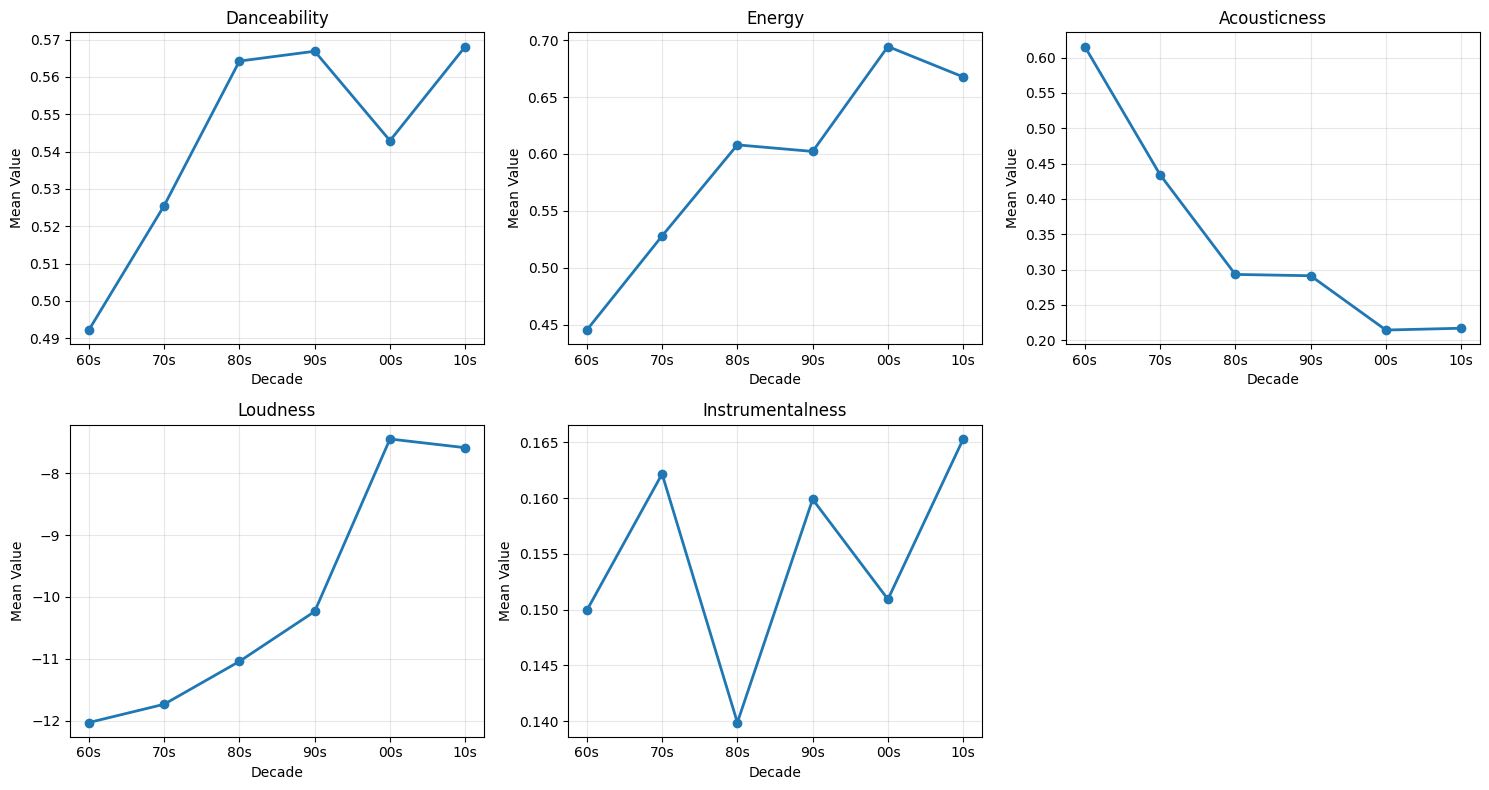

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(features):
    temporal[feature].plot(ax=axes[idx], marker='o', linewidth=2)
    axes[idx].set_title(feature.capitalize())
    axes[idx].set_xlabel('Decade')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].grid(alpha=0.3)

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('figures/temporal_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Distributions: Hits vs Flops

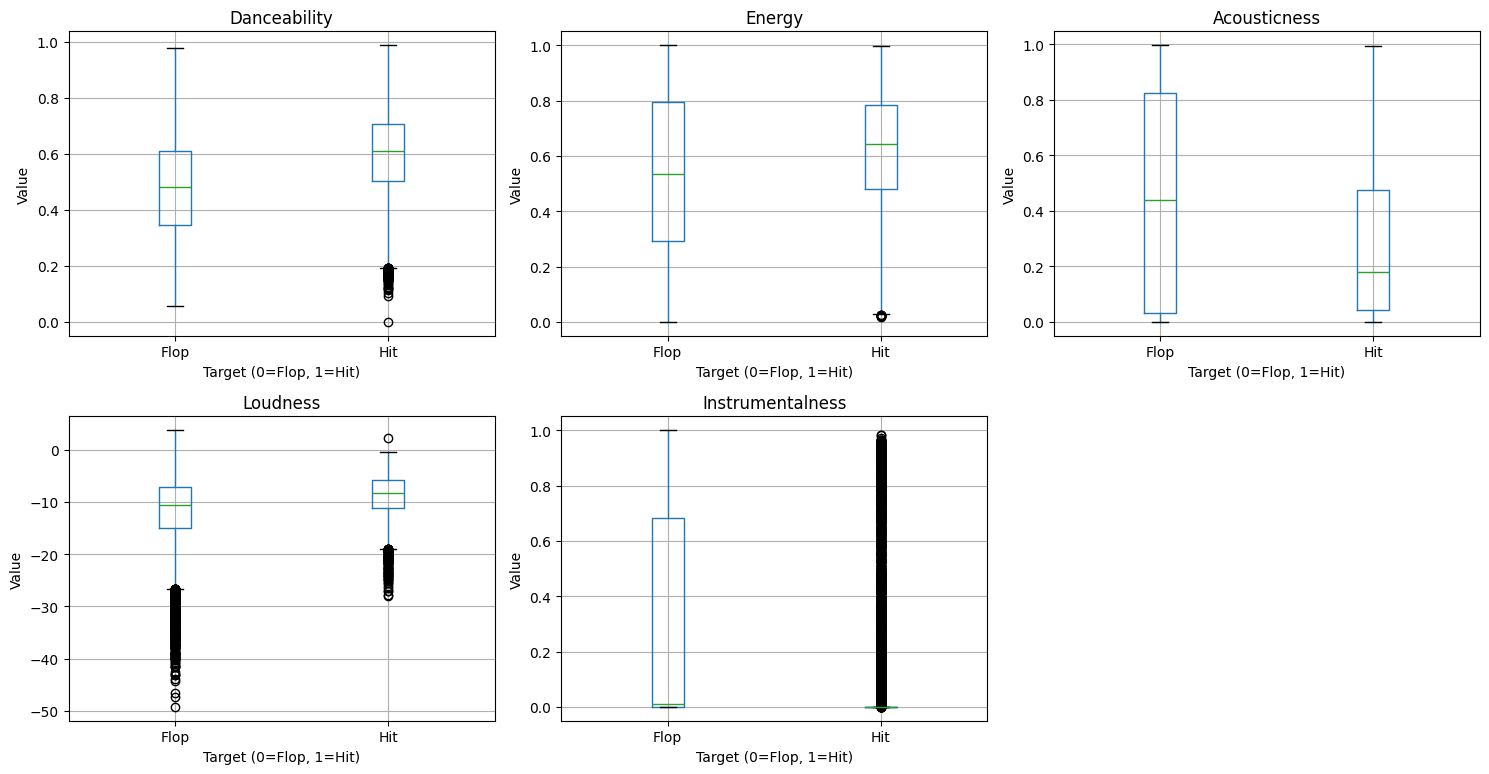

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(features):
    df.boxplot(column=feature, by='target', ax=axes[idx])
    axes[idx].set_title(feature.capitalize())
    axes[idx].set_xlabel('Target (0=Flop, 1=Hit)')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Flop', 'Hit'])

axes[-1].axis('off')
plt.suptitle('')
plt.tight_layout()
plt.savefig('figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

Quantify the differences:

In [11]:
comparison = df.groupby('target')[features].mean()
comparison.loc['difference'] = comparison.loc[1] - comparison.loc[0]
comparison

,danceability,energy,acousticness,loudness,instrumentalness
target,,,,,
0,0.478153,0.534794,0.447581,-11.740813,0.278145
1,0.601237,0.624296,0.280814,-8.702237,0.030687
difference,0.123085,0.089501,-0.166767,3.038576,-0.247458


## Feature Relationships

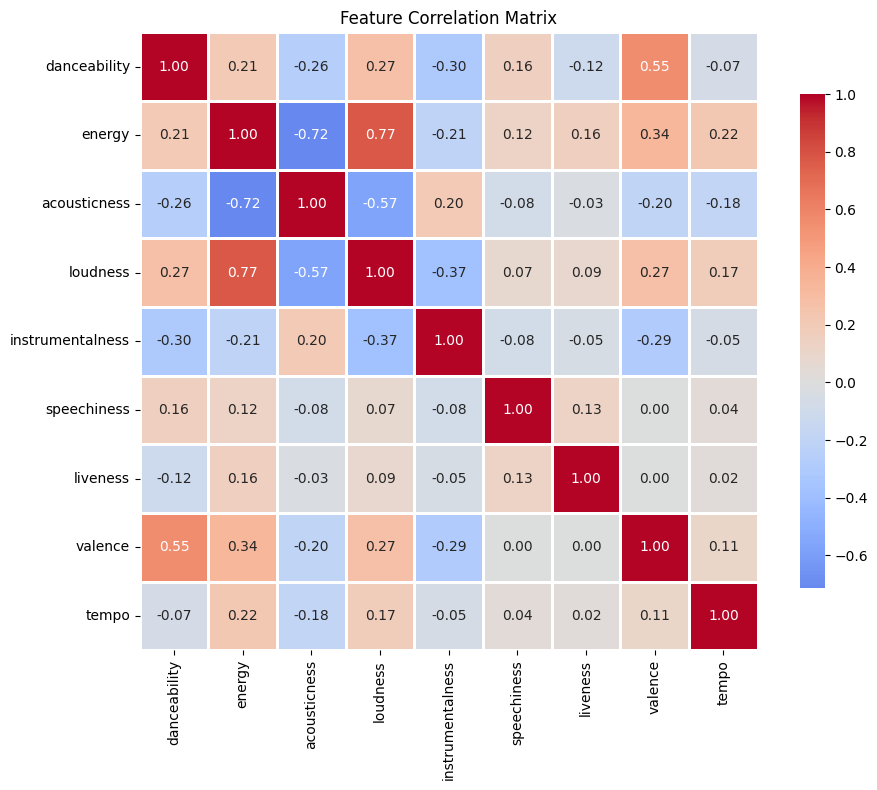

In [12]:
audio_features = ['danceability', 'energy', 'acousticness', 'loudness', 
                  'instrumentalness', 'speechiness', 'liveness', 'valence', 'tempo']
corr = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Can we separate hits from flops in 2D space?

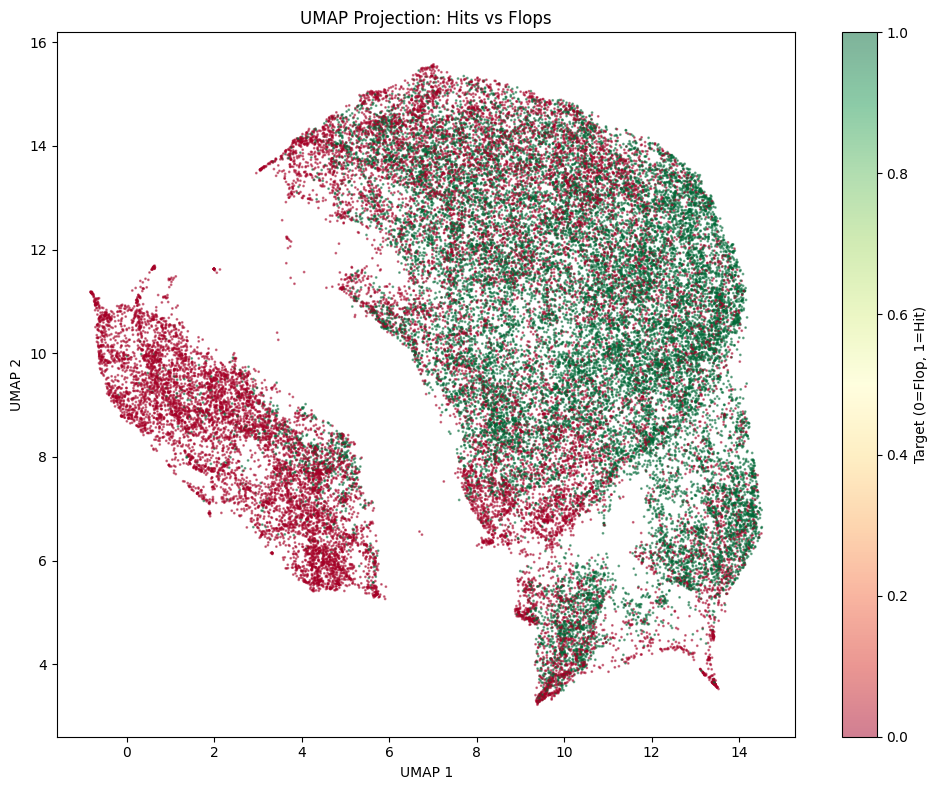

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from umap import UMAP

X = df[audio_features]
X_scaled = StandardScaler().fit_transform(X)

umap = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
embedding = umap.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], 
                     c=df['target'], cmap='RdYlGn', 
                     alpha=0.5, s=1)
plt.colorbar(scatter, label='Target (0=Flop, 1=Hit)')
plt.title('UMAP Projection: Hits vs Flops')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.savefig('figures/umap_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

## API Exploration

Quick look at additional Spotify features available via API.

In [14]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [15]:
import sys
sys.path.append('..')
from credentials import SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=SPOTIFY_CLIENT_ID,
    client_secret=SPOTIFY_CLIENT_SECRET
))

In [16]:
sample = df.sample(10, random_state=42)
artist_data = []

for uri in sample['uri']:
    track_id = uri.split(':')[-1]
    track_info = sp.track(track_id)
    artist_id = track_info['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    
    artist_data.append({
        'track': track_info['name'],
        'artist': artist_info['name'],
        'artist_popularity': artist_info['popularity'],
        'artist_followers': artist_info['followers']['total'],
        'genres': artist_info['genres'][:3] if artist_info['genres'] else []
    })

pd.DataFrame(artist_data)

,track,artist,artist_popularity,artist_followers,genres
0,Nachtlager N. Granada - The Lower Castle Yard ...,Traditional,62,101404,"[bhajan, gregorian chant]"
1,How's It Going to Be,Third Eye Blind,67,1773667,[]
2,Heavenly Perverse,Dimmu Borgir,49,582785,"[black metal, metal, symphonic metal]"
3,Era um Garoto Que Como Eu Amava os Beatles e o...,Os Incríveis,35,103142,[brega]
4,Clavel Sevillano,Javier Solís,63,2549907,"[ranchera, bolero, mariachi]"
5,Amen,Harry Belafonte,59,279870,[calypso]
6,Make You Rock (Bonus Track) - 4.0 Version,Monica Naranjo,60,892873,[latin pop]
7,Throw That Metal,I Heart Hiroshima,4,1354,[]
8,Get Up and Boogie (That's Right) - Radio Mix,Silver Convention,39,98935,[disco]
9,La Entrega,Javier Solís,63,2549907,"[ranchera, bolero, mariachi]"


In [17]:
missing_count = 0
available_artists = []

for uri in df.sample(100, random_state=42)['uri']:
    try:
        track_id = uri.split(':')[-1]
        track_info = sp.track(track_id)
        artist_id = track_info['artists'][0]['id']
        artist_info = sp.artist(artist_id)
        available_artists.append(artist_info['popularity'])
    except:
        missing_count += 1

print(f"Available: {len(available_artists)}/100")
print(f"Mean artist popularity: {np.mean(available_artists):.1f}")

Available: 100/100
Mean artist popularity: 48.7


## Key Findings

**Temporal Variation:** Audio features changed substantially across six decades. Acousticness decreased from 0.62 (60s) to 0.22 (00s-10s), loudness increased ~4.5dB.

**Feature Separation:** Hits show higher danceability (+12%), loudness (+3dB), and lower instrumentalness (-89%). However, distributions overlap considerably.

**Class Structure:** UMAP shows mixed clustering without clear boundaries. Balanced dataset (20,553 hits, 20,553 flops) with no missing values across 41K tracks.

**API Availability:** Artist metadata accessible for 100% of sampled tracks. Artist popularity ranges 4-67 (mean 48.7), followers range 1.3K-2.5M.

## Open Questions for Modeling

**Temporal handling:** Should we use era-based splits or treat all decades equally? Features evolved substantially over time.

**Feature augmentation:** Artist popularity and followers accessible via API. Worth incorporating?

**Overlap problem:** Classes show separation but considerable overlap. May need non-linear models or ensemble methods.

**Feature interactions:** Energy-loudness correlation (0.77) suggests potential interaction terms. Danceability-valence (0.55) also candidates.

**Era-specific patterns:** 1960s hits differ from 2010s hits. Single model or decade-specific approaches?